<a href="https://colab.research.google.com/github/icygit6/image-processing/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

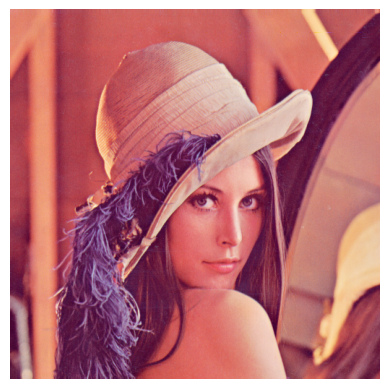

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
imop = Image.open(path)
plt.imshow(imop)
plt.axis("off")
plt.show()

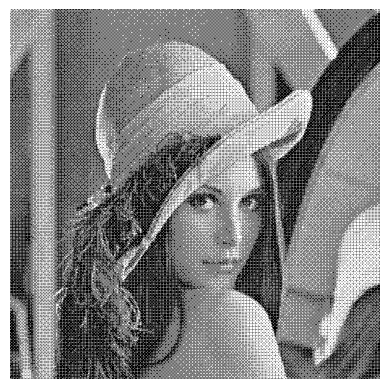

In [ ]:
# @title Modify the order matrix in the ordered dithering method
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
img = Image.open(path).convert('L')
image = np.array(img)
ditherArray = np.array([
    [0.513, 0.272, 0.724, 0.483, 0.543, 0.302, 0.694, 0.453],
    [0.151, 0.755, 0.091, 0.966, 0.181, 0.758, 0.121, 0.936],
    [0.634, 0.392, 0.574, 0.332, 0.664, 0.423, 0.604, 0.362],
    [0.03,  0.906, 0.241, 0.845, 0.06,  0.875, 0.211, 0.815],
    [0.543, 0.302, 0.694, 0.453, 0.513, 0.272, 0.724, 0.483],
    [0.181, 0.758, 0.121, 0.936, 0.151, 0.755, 0.091, 0.966],
    [0.664, 0.423, 0.604, 0.362, 0.634, 0.392, 0.574, 0.332],
    [0.06,  0.875, 0.211, 0.815, 0.03,  0.906, 0.241, 0.845]
])
h, w = image.shape # get the dimensions (height and width) of the image
orderdither = np.zeros_like(image)# create an empty array to store the dithered image
for i in range(0, h, 8):# loop image blocks of 8 pixels vertically
    for j in range(0, w, 8):# loop image blocks of 8 pixels horizontally
        for x in range(8):# loop through each row within the 8x8 block
            for y in range(8):
                if i + x < h and j + y < w: # to mak sure the pixel is within image bounds
                    pixelvalue = image[i + x, j + y] / 255.0 # valeu set to range [0,1]
                    if pixelvalue > ditherArray[x, y]:# compare pixel value
                      orderdither[i + x, j + y] = 255 # set pixel to white if above threshold
                    else:
                       0# set pixel to black if below threshold
plt.imshow(orderdither, cmap="gray")
plt.axis("off")
plt.show()

solved the order matrix by dithered methos using the array given , i am still figuring out how this works ooptimizely.

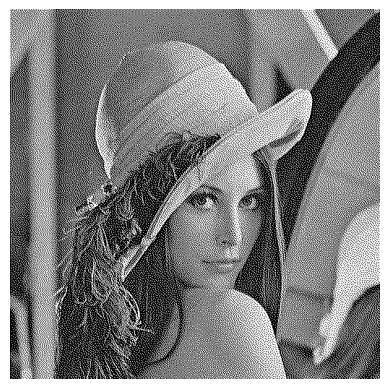

In [ ]:
# @title Modify the diffusion weights in the error diffusion method
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
img = Image.open(path).convert("L")
OriginalImage = np.array(img)
errorarray = np.array([
    [0.0,    0.0,     0.0,     0.19040, 0.095230],
    [0.04762, 0.095230, 0.19040, 0.095230, 0.04762],
    [0.02381, 0.047620, 0.095230, 0.047620, 0.02381]
])
h, w = OriginalImage.shape # get the dimensions
HalftoneImage = np.copy(OriginalImage)# make copy of the original image  of halftoning image
for i in range(h):# loop each row fo image
    for j in range(w):# loop each column of image
        if HalftoneImage[i, j] < 128:# if pixel value is less than 128
            errorvalue = HalftoneImage[i, j] - 0# calculate error
            HalftoneImage[i, j] = 0 #set pixel value to 0 (black)
        else:
            errorvalue = HalftoneImage[i, j] - 255
            HalftoneImage[i, j] = 255 # set pixel value to 255 (white)
        for x in range(3):  # adjusted for 3 rows in errorArray
            if i + x < 0 or i + x >= h:# check if row is within image bounds
                continue
            for y in range(-2, 3):  # loop through the columns of the error diffusion matrix
                if j + y < 0 or j + y >= w:
                    continue
                if errorarray[x, y + 2] == 0:  # skip if the weight is 0
                    continue
                Weightvalue = errorarray[x, y + 2] * errorvalue # calculate weighted error value
                HalftoneImage[i + x, j + y] = np.clip(HalftoneImage[i + x, j + y] + Weightvalue, 0, 255)
plt.imshow(HalftoneImage, cmap="gray")
plt.axis("off")
plt.show()

i finf this similar to the dithered method, but by using the different array it took me sometime to complete the task by ifguring out how to initialize each pixels and the halftoning loops

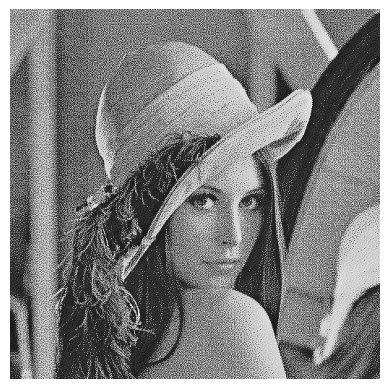

In [ ]:
# @title Modify the diffusion order matrix and diffusion weight matrix in the point diffusion method
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
img = Image.open(path).convert("L")
halftoneimage = np.array(img)
classmatrix = np.array([
    [204, 0, 5, 33, 51, 59, 23, 118, 54, 69, 40, 160, 169, 110, 168, 188],
    [3, 6, 22, 36, 60, 50, 74, 115, 140, 82, 147, 164, 171, 142, 220, 214],
    [14, 7, 42, 16, 63, 52, 94, 56, 133, 152, 158, 177, 179, 208, 222, 1],
    [15, 26, 43, 75, 79, 84, 148, 81, 139, 136, 166, 102, 217, 219, 226, 4],
    [17, 39, 72, 92, 103, 108, 150, 135, 157, 193, 190, 100, 223, 225, 227, 13],
    [28, 111, 99, 87, 116, 131, 155, 112, 183, 196, 181, 224, 232, 228, 12, 21],
    [47, 120, 91, 105, 125, 132, 172, 180, 184, 205, 175, 233, 245, 8, 20, 41],
    [76, 65, 129, 137, 165, 145, 178, 194, 206, 170, 229, 244, 246, 19, 24, 49],
    [80, 73, 106, 138, 176, 182, 174, 197, 218, 235, 242, 249, 247, 18, 48, 68],
    [101, 107, 134, 153, 185, 163, 202, 173, 231, 241, 248, 253, 44, 88, 70, 45],
    [123, 141, 149, 61, 195, 200, 221, 234, 240, 243, 254, 38, 46, 77, 104, 109],
    [85, 96, 156, 130, 203, 215, 230, 250, 251, 252, 255, 53, 62, 93, 86, 117],
    [151, 167, 189, 207, 201, 216, 236, 239, 25, 31, 34, 113, 83, 95, 124, 114],
    [144, 146, 191, 209, 213, 237, 238, 29, 32, 55, 64, 97, 126, 78, 128, 159],
    [187, 192, 198, 212, 9, 10, 30, 35, 58, 67, 90, 71, 122, 127, 154, 161],
    [199, 210, 211, 2, 11, 27, 37, 57, 66, 89, 98, 121, 119, 143, 162, 186]
])
erroray = np.array([
    [0.38459, 1, 0.38459],
    [1, 0, 1],              #weigths for teh pixels in the error diffusion process
    [0.38459, 1, 0.38459]
])
h, w = halftoneimage.shape # get the heigth and width of teh halftone image
for k in range(256):   # iterate over intensity levels from 0 to 255
    for i in range(0, h, 16):# loop over the image on blocks of 16x16 pixels
        for j in range(0, w, 16):# loop over each pixel in the 16x16 block
            for x in range(16):
                for y in range(16):
                    if k == classmatrix[x][y]:# check if the current pixel matches the intensity level k
                        if halftoneimage[i + x, j + y] < 128:
                            errorvalue = halftoneimage[i + x, j + y] - 0
                            halftoneimage[i + x, j + y] = 0 # set pixel value to 0 (black)
                        else:
                            errorvalue = halftoneimage[i + x, j + y] - 255
                            halftoneimage[i + x, j + y] = 255 # set pixel value to 255(white)
                        weightsum = 0 # initialize sum of weigths
                        for p in range(-1, 2): # loop over the error diffusion weigths
                            if i + x + p < 0 or i + x + p >= h:# condition check
                                continue
                            for q in range(-1, 2):
                                if j + y + q < 0 or j + y + q >= w:
                                    continue
                                weightsum += erroray[p + 1][q + 1] # weights sum
                        if weightsum != 0:
                            for p in range(-1, 2):
                                if i + x + p < 0 or i + x + p >= h:
                                    continue
                                for q in range(-1, 2):
                                    if j + y + q < 0 or j + y + q >= w:
                                        continue
                                        # update neighboring pixel value with the weighted error
                                    halftoneimage[i + x + p][j + y + q] = np.clip(halftoneimage[i + x + p][j + y + q] + (errorvalue * erroray[p + 1][q + 1] / weightsum), 0, 255)
plt.imshow(halftoneimage, cmap="gray")
plt.axis("off")
plt.show()

this is the most stressful part of this week's task , because i need to translate the code from c++ into pyrhon and the changes of loops that i need to make it happen for the image pixels and adjust it with the arrays

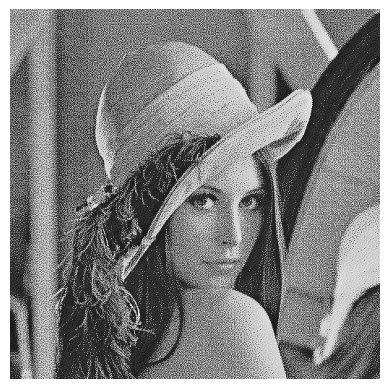

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and convert the image to grayscale
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
img = Image.open(path).convert("L")
halftoneimage = np.array(img)

# Class matrix for dithering
classmatrix = np.array([
    [204, 0, 5, 33, 51, 59, 23, 118, 54, 69, 40, 160, 169, 110, 168, 188],
    [3, 6, 22, 36, 60, 50, 74, 115, 140, 82, 147, 164, 171, 142, 220, 214],
    [14, 7, 42, 16, 63, 52, 94, 56, 133, 152, 158, 177, 179, 208, 222, 1],
    [15, 26, 43, 75, 79, 84, 148, 81, 139, 136, 166, 102, 217, 219, 226, 4],
    [17, 39, 72, 92, 103, 108, 150, 135, 157, 193, 190, 100, 223, 225, 227, 13],
    [28, 111, 99, 87, 116, 131, 155, 112, 183, 196, 181, 224, 232, 228, 12, 21],
    [47, 120, 91, 105, 125, 132, 172, 180, 184, 205, 175, 233, 245, 8, 20, 41],
    [76, 65, 129, 137, 165, 145, 178, 194, 206, 170, 229, 244, 246, 19, 24, 49],
    [80, 73, 106, 138, 176, 182, 174, 197, 218, 235, 242, 249, 247, 18, 48, 68],
    [101, 107, 134, 153, 185, 163, 202, 173, 231, 241, 248, 253, 44, 88, 70, 45],
    [123, 141, 149, 61, 195, 200, 221, 234, 240, 243, 254, 38, 46, 77, 104, 109],
    [85, 96, 156, 130, 203, 215, 230, 250, 251, 252, 255, 53, 62, 93, 86, 117],
    [151, 167, 189, 207, 201, 216, 236, 239, 25, 31, 34, 113, 83, 95, 124, 114],
    [144, 146, 191, 209, 213, 237, 238, 29, 32, 55, 64, 97, 126, 78, 128, 159],
    [187, 192, 198, 212, 9, 10, 30, 35, 58, 67, 90, 71, 122, 127, 154, 161],
    [199, 210, 211, 2, 11, 27, 37, 57, 66, 89, 98, 121, 119, 143, 162, 186]
])

# Error diffusion weights
erroray = np.array([
    [0.38459, 1, 0.38459],
    [1, 0, 1],
    [0.38459, 1, 0.38459]
])

# Get the height and width of the halftone image
h, w = halftoneimage.shape

# Process each intensity level
for k in range(256):
    for i in range(0, h, 16):
        for j in range(0, w, 16):
            for x in range(16):
                for y in range(16):
                    if i + x < h and j + y < w:  # Check if within bounds
                        if k == classmatrix[x][y]:
                            if halftoneimage[i + x, j + y] < 128:
                                errorvalue = halftoneimage[i + x, j + y] - 0
                                halftoneimage[i + x, j + y] = 0  # Set pixel to black
                            else:
                                errorvalue = halftoneimage[i + x, j + y] - 255
                                halftoneimage[i + x, j + y] = 255  # Set pixel to white

                            weightsum = 0  # Initialize sum of weights
                            for p in range(-1, 2):
                                for q in range(-1, 2):
                                    ni, nj = i + x + p, j + y + q
                                    if 0 <= ni < h and 0 <= nj < w:  # Check if within bounds
                                        weightsum += erroray[p + 1][q + 1]

                            if weightsum != 0:
                                for p in range(-1, 2):
                                    for q in range(-1, 2):
                                        ni, nj = i + x + p, j + y + q
                                        if 0 <= ni < h and 0 <= nj < w:  # Check if within bounds
                                            halftoneimage[ni][nj] = np.clip(
                                                halftoneimage[ni][nj] + (errorvalue * erroray[p + 1][q + 1] / weightsum), 0, 255
                                            )

# Display the processed image
plt.imshow(halftoneimage, cmap="gray")
plt.axis("off")
plt.show()
